# P-h線図の作成（CoolProp + Python）

このノートブックでは、CoolPropを用いて冷媒R134aのP-h線図を描画します。

使用にあたっては、以下のライブラリが必要です。
- CoolProp
- NumPy
- Matplotlib

## 1. ライブラリの読み込み

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

## 2. 飽和線（ドーム）の計算

In [15]:
fluid = 'R134a'

T_min = PropsSI('Ttriple', fluid)
T_crit = PropsSI('Tcrit', fluid)

T_sat = np.linspace(T_min, T_crit - 0.001, 500)

h_l, h_v, P_sat = [], [], []

for T in T_sat:
    P = PropsSI('P', 'T', T, 'Q', 0, fluid)
    P_sat.append(P)
    h_l.append(PropsSI('H', 'T', T, 'Q', 0, fluid))
    h_v.append(PropsSI('H', 'T', T, 'Q', 1, fluid))

h_l = np.array(h_l) / 1000  # kJ/kg
h_v = np.array(h_v) / 1000
P_sat = np.array(P_sat) / 1e6  # MPa

## 3. 等温線の計算

In [16]:
T_list = [273.15, 293.15, 313.15, 333.15]  # K
P_range = np.logspace(5, 7, 200)

isoT_data = []

for T in T_list:
    h, P_plot = [], []
    for P in P_range:
        try:
            h.append(PropsSI('H', 'T', T, 'P', P, fluid) / 1000)
            P_plot.append(P / 1e6)
        except:
            pass
    isoT_data.append((h, P_plot))

## 4. P-h線図の描画

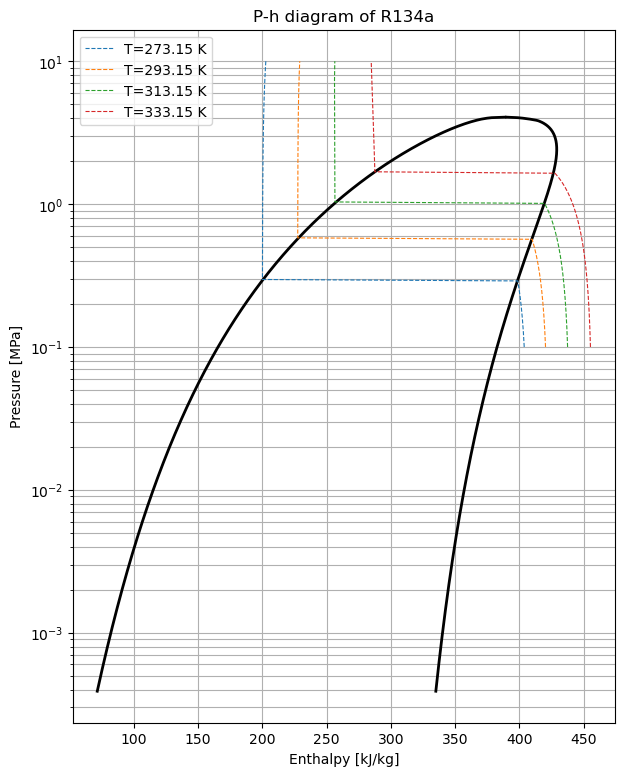

In [17]:
plt.figure(figsize=(7, 9))

# 飽和線
plt.plot(h_l, P_sat, 'k', linewidth=2)
plt.plot(h_v, P_sat, 'k', linewidth=2)

# 等温線
for (h, P_plot), T in zip(isoT_data, T_list):
    plt.plot(h, P_plot, '--', linewidth=0.8, label=f'T={T} K')

plt.yscale('log')
plt.xlabel('Enthalpy [kJ/kg]')
plt.ylabel('Pressure [MPa]')
plt.title(f'P-h diagram of {fluid}')
plt.grid(True, which='both')
plt.legend()
plt.show()

## 5. 冷凍サイクルの重ね描き（理想例）

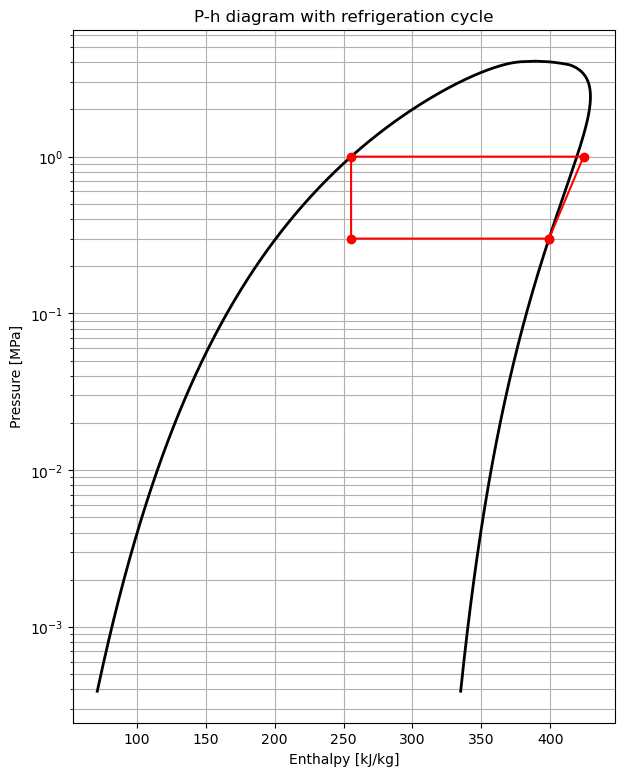

In [18]:
P_low = 3e5
P_high = 1e6

h1 = PropsSI('H', 'P', P_low, 'Q', 1, fluid) / 1000
s1 = PropsSI('S', 'P', P_low, 'Q', 1, fluid)
h2 = PropsSI('H', 'P', P_high, 'S', s1, fluid) / 1000
h3 = PropsSI('H', 'P', P_high, 'Q', 0, fluid) / 1000
h4 = h3

P_cycle = np.array([P_low, P_high, P_high, P_low, P_low]) / 1e6
h_cycle = [h1, h2, h3, h4, h1]

plt.figure(figsize=(7, 9))
plt.plot(h_l, P_sat, 'k', linewidth=2)
plt.plot(h_v, P_sat, 'k', linewidth=2)
plt.plot(h_cycle, P_cycle, 'ro-')
plt.yscale('log')
plt.xlabel('Enthalpy [kJ/kg]')
plt.ylabel('Pressure [MPa]')
plt.title('P-h diagram with refrigeration cycle')
plt.grid(True, which='both')
plt.show()